In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# Transformations for dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for grayscale images
])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)




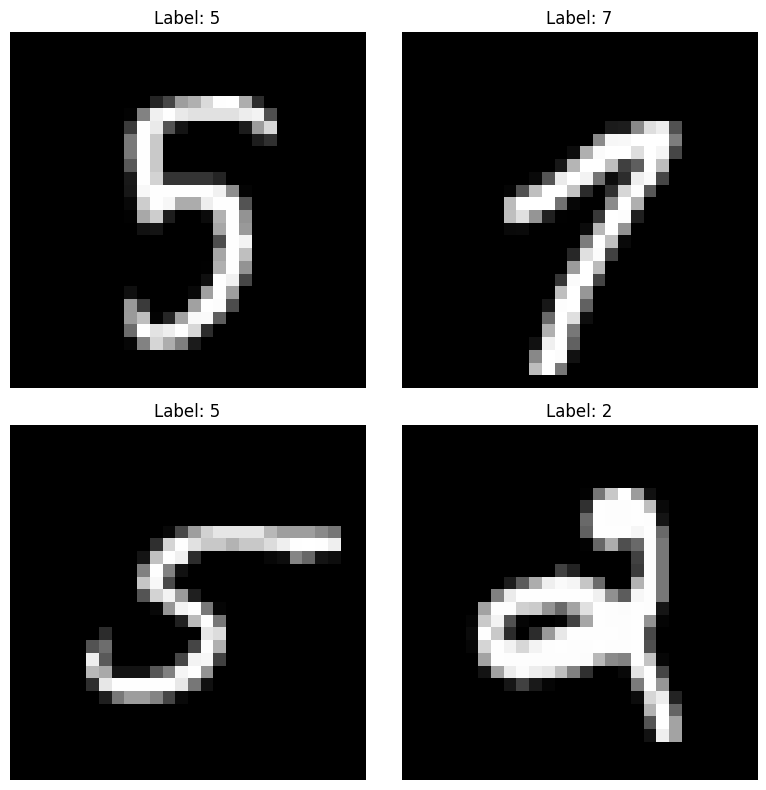

In [2]:

def imshow(img):
    img = img.squeeze()  # Remove channel dimension for grayscale images
    img = img.numpy()  # Convert tensor to NumPy array
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Visualizing one batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Ensure images are on CPU
images = images.cpu()
labels = labels.cpu()

# Display the images
plt.figure(figsize=(8, 8))
for idx in range(len(images)):
    plt.subplot(2, 2, idx + 1) 
    imshow(images[idx])
    plt.title(f'Label: {labels[idx].item()}')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

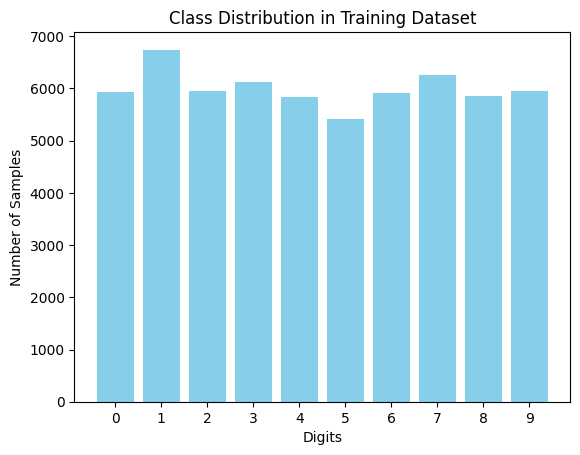

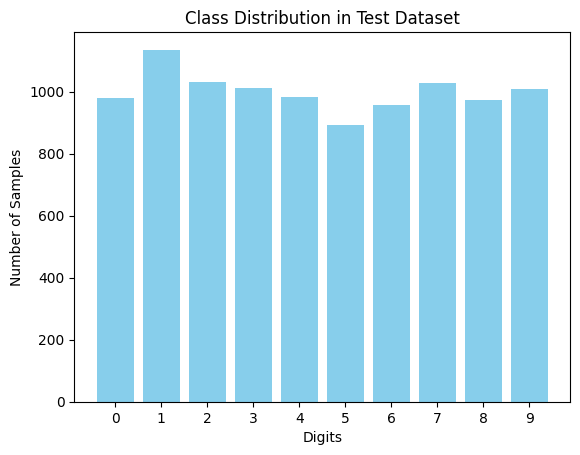

Training Dataset Class Distribution:
Digit 5: 5421 samples
Digit 0: 5923 samples
Digit 4: 5842 samples
Digit 1: 6742 samples
Digit 9: 5949 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples

Test Dataset Class Distribution:
Digit 7: 1028 samples
Digit 2: 1032 samples
Digit 1: 1135 samples
Digit 0: 980 samples
Digit 4: 982 samples
Digit 9: 1009 samples
Digit 5: 892 samples
Digit 6: 958 samples
Digit 3: 1010 samples
Digit 8: 974 samples


In [3]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from collections import Counter

# Define transformations with data augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Randomly rotate images by ±15 degrees
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip with 50% probability
    transforms.RandomResizedCrop(size=28, scale=(0.8, 1.0)),  # Random zoom (resize within scale)
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5, std=0.5
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets with transformations
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform_train,
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform_test,
    download=True
)

# Count the class distribution for training and test datasets
train_labels = train_dataset.targets
test_labels = test_dataset.targets

train_counts = Counter(train_labels.numpy())
test_counts = Counter(test_labels.numpy())

# Function to visualize class distribution
def plot_class_distribution(counts, title):
    classes = list(counts.keys())
    counts = list(counts.values())
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Digits')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(classes)
    plt.show()

# Plot for training dataset
plot_class_distribution(train_counts, "Class Distribution in Training Dataset")

# Plot for test dataset
plot_class_distribution(test_counts, "Class Distribution in Test Dataset")

# Print class counts for both datasets
print("Training Dataset Class Distribution:")
for digit, count in train_counts.items():
    print(f"Digit {digit}: {count} samples")

print("\nTest Dataset Class Distribution:")
for digit, count in test_counts.items():
    print(f"Digit {digit}: {count} samples")


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the CNN model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x




In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet().to(device)

# Cross-Entropy Loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Load dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [6]:
 #Variables for plotting
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (i + 1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0.0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct_test / total_test)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracies[-1]:.4f}%, Test Accuracy: {test_accuracies[-1]:.4f}%')

Epoch [1/5], Step [200/938], Loss: 0.3427
Epoch [1/5], Step [400/938], Loss: 0.5605
Epoch [1/5], Step [600/938], Loss: 0.1889
Epoch [1/5], Step [800/938], Loss: 0.1789
Epoch [1/5], Train Accuracy: 85.9167%, Test Accuracy: 97.6600%
Epoch [2/5], Step [200/938], Loss: 0.1723
Epoch [2/5], Step [400/938], Loss: 0.1366
Epoch [2/5], Step [600/938], Loss: 0.0595
Epoch [2/5], Step [800/938], Loss: 0.0985
Epoch [2/5], Train Accuracy: 96.0483%, Test Accuracy: 98.1500%
Epoch [3/5], Step [200/938], Loss: 0.0528
Epoch [3/5], Step [400/938], Loss: 0.1033
Epoch [3/5], Step [600/938], Loss: 0.1398
Epoch [3/5], Step [800/938], Loss: 0.2928
Epoch [3/5], Train Accuracy: 97.3167%, Test Accuracy: 98.7000%
Epoch [4/5], Step [200/938], Loss: 0.0235
Epoch [4/5], Step [400/938], Loss: 0.1232
Epoch [4/5], Step [600/938], Loss: 0.0704
Epoch [4/5], Step [800/938], Loss: 0.3597
Epoch [4/5], Train Accuracy: 97.5717%, Test Accuracy: 98.6500%
Epoch [5/5], Step [200/938], Loss: 0.0175
Epoch [5/5], Step [400/938], Loss:

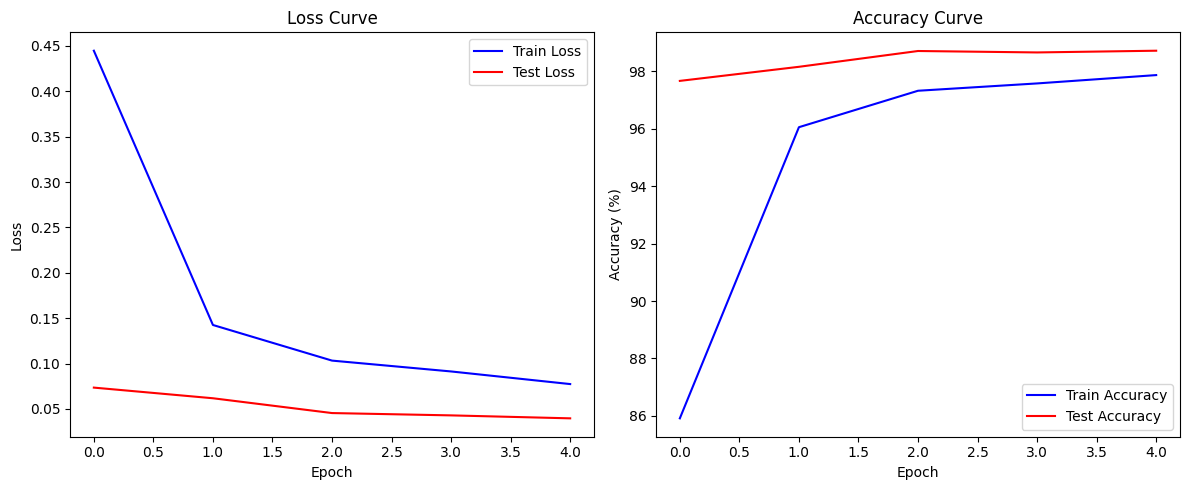

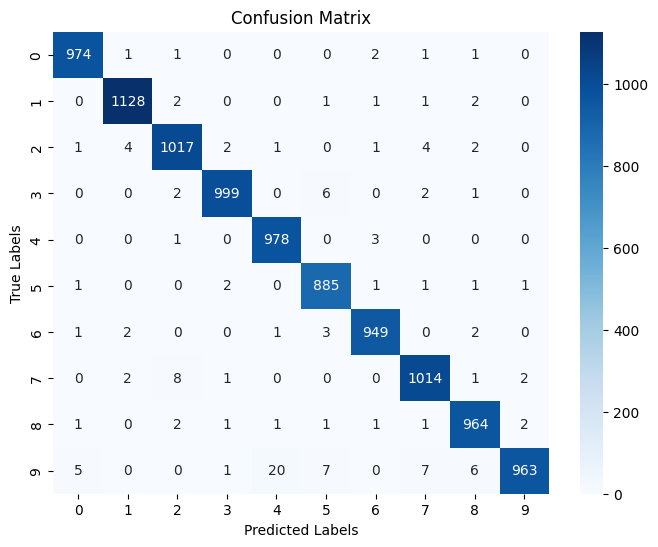

In [7]:
# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(num_epochs), test_losses, label='Test Loss', color='red')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy', color='red')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='macro')
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.9871
F1 Score: 0.9870
Precision: 0.9870
Recall: 0.9871
